[Reference](https://betterprogramming.pub/a-complete-guide-for-converting-python-notebook-into-interactive-web-application-1288ae22b5cf)

# Financial Analyzer web application using Mercury

In [5]:
ticket = "^GSPC"
year= [2020,2022]
ma_7d=True
ma_14d=True
ma_21d=True
indicators=["MACD","RSI"]
lastndays=30

In [6]:
# if not installed 
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install pandas_datareader
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 7.6 MB/s 


In [7]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_datareader as dr
import requests
import mplfinance as mpl
import warnings
from datetime import date

In [9]:
## date yyyy-dd-mm
start_date= str(year[0])
end_date=date.today()
finData=dr.data.get_data_yahoo(ticket,start=start_date,end=end_date)

In [10]:
from  bs4 import BeautifulSoup
def get_symbol(symbol):
   url= f"https://finance.yahoo.com/quote/{symbol}"
   soup = BeautifulSoup(requests.get(url).text, "html.parser")
   name = soup.h1.text.strip()
   return name
   
fullName = get_symbol(ticket)

In [11]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

printmd(f'# {fullName}')

# S&P 500 (^GSPC)

In [12]:
printmd("## high-low-open-close(hloc) first 5 days financial data")
finData.head(5)

## high-low-open-close(hloc) first 5 days financial data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932
2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049


## Last 30 days Candlestick chart of S&P 500 (^GSPC)

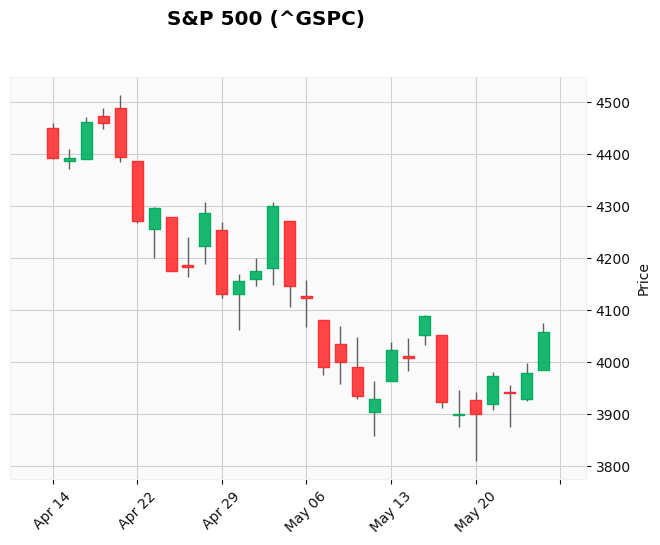

In [13]:
#candlestick chart
printmd(f"## Last {lastndays} days Candlestick chart of {fullName}")
warnings.filterwarnings("ignore")
mpl.plot(finData[-lastndays:],type="candle",style="yahoo",title=fullName)

In [14]:
# moving averages on close datas
techAnalysis=finData[["Close"]]
if ma_7d:
    techAnalysis["ma_7d"]=techAnalysis["Close"].rolling(5).mean()
if ma_14d:
    techAnalysis["ma_14d"]=techAnalysis["Close"].rolling(14).mean()
if ma_21d:
    techAnalysis["ma_21d"]=techAnalysis["Close"].rolling(21).mean()

In [15]:
# MACD calculate
if "MACD" in indicators:
    k = techAnalysis['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
    d = techAnalysis['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
    macd=k-d
    macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
    macd_h = macd - macd_s
    techAnalysis['macd'] = techAnalysis.index.map(macd)
    techAnalysis['macd_h'] = techAnalysis.index.map(macd_h)
    techAnalysis['macd_s'] = techAnalysis.index.map(macd_s)

In [16]:
pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 26.5 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=732dd0c50216047b2664aa644c6040d804b2b99345c4a52932c10f426c2f80a3
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [17]:
## RSI calculate
if "RSI" in indicators:
    import pandas_ta as pta
    techAnalysis["RSI"]=pta.rsi(techAnalysis["Close"],lenght="14")

In [18]:
if "Volume" in indicators:
    isvolumeexist = True if finData["Volume"][0] != 0.0  else False

## Technical analysis for S&P 500 (^GSPC) moving averages,MACD,RSI,Volume

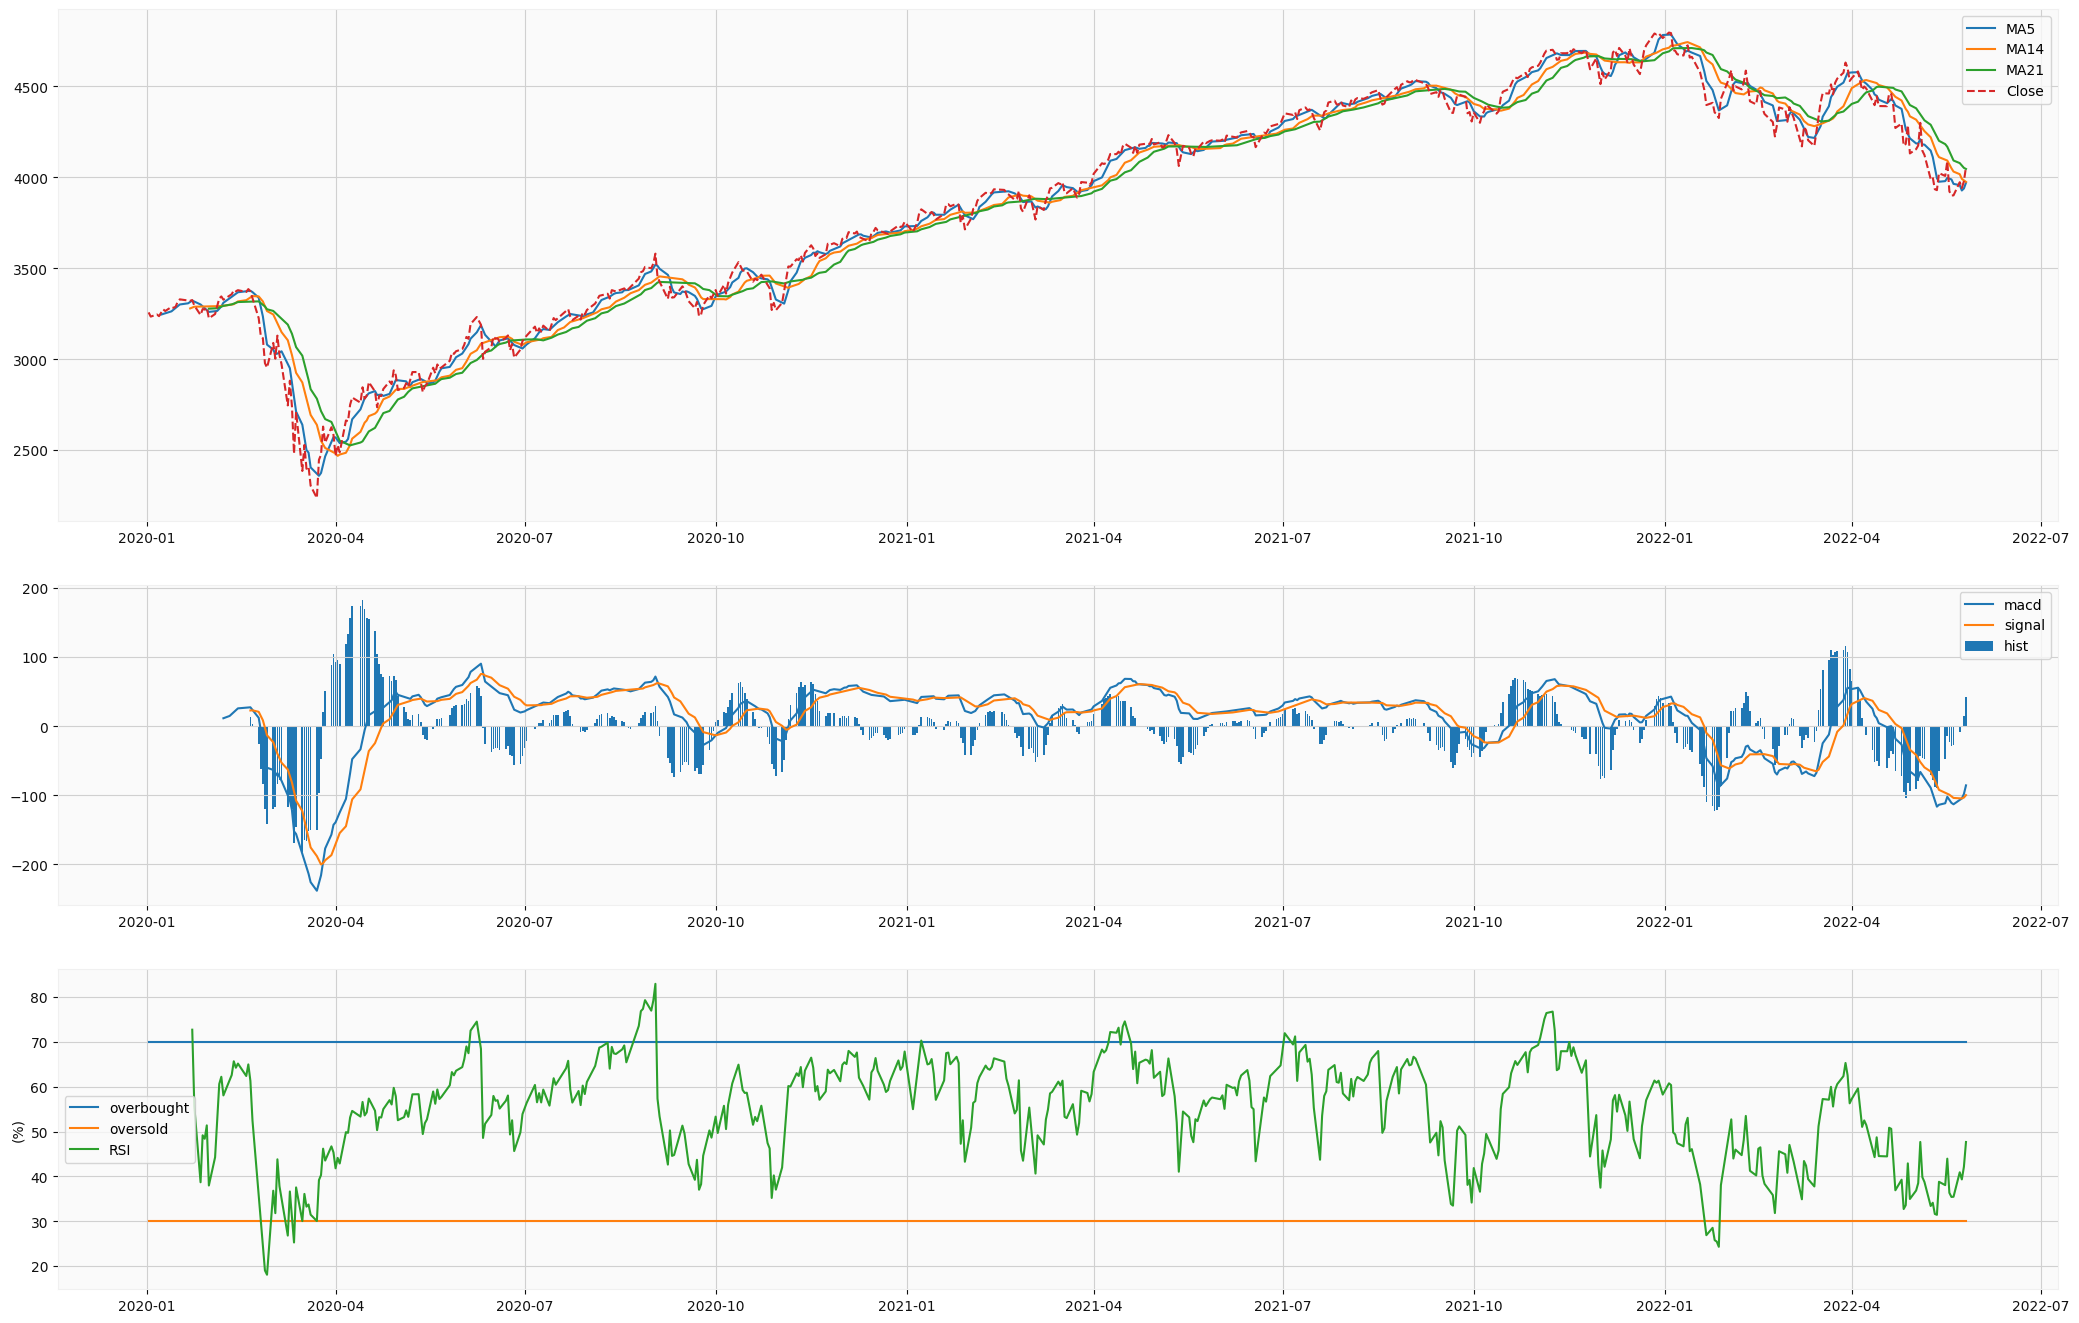

In [19]:
warnings.filterwarnings("ignore")

printmd(f"## Technical analysis for {fullName} moving averages,MACD,RSI,Volume")

fig= plt.figure()
fig.set_size_inches((20, 16))
ax_candle = fig.add_axes((0, 0.72, 1, 0.32))

# candle&MAs
if ma_7d:
    ax_candle.plot(techAnalysis.index, techAnalysis["ma_7d"], label="MA5") 
if ma_14d:
    ax_candle.plot(techAnalysis.index, techAnalysis["ma_14d"], label="MA14")
if ma_21d:
    ax_candle.plot(techAnalysis.index, techAnalysis["ma_21d"], label="MA21")

ax_candle.plot(techAnalysis.index,techAnalysis["Close"],ls="--",label="Close")
#candlestick_ochl(ax_candle ,ochl, colorup="g", colordown="r", width=0.4,alpha=0.8)
ax_candle.legend()

# MACD
if "MACD" in indicators:
    ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
    ax_macd.plot(techAnalysis.index, techAnalysis["macd"], label="macd")
    ax_macd.bar(techAnalysis.index, techAnalysis["macd_h"] * 3, label="hist")
    ax_macd.plot(techAnalysis.index, techAnalysis["macd_s"], label="signal")
    ax_macd.legend()

# RSI
if "RSI" in indicators:
    ax_rsi = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
# Above 70% = overbought, below 30% = oversold
    ax_rsi.set_ylabel("(%)")
    ax_rsi.plot(techAnalysis.index, [70] * len(techAnalysis.index), label="overbought")
    ax_rsi.plot(techAnalysis.index, [30] * len(techAnalysis.index), label="oversold")
    ax_rsi.plot(techAnalysis.index, techAnalysis["RSI"], label="RSI")
    ax_rsi.legend()

# Volume
if "Volume" in indicators and  isvolumeexist:
    ax_vol = fig.add_axes((0, 0, 1, 0.2), sharex=ax_candle)
    ax_vol.bar(finData.index, finData["Volume"]/1000000)
    ax_vol.set_ylabel("(Million)")